# Introduction
Hey, That is my second notebook here...

I'm trying to motivate myself by using what I've learned from many sources :)

I appreciate you considering this.

In [21]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

import seaborn as sns
%matplotlib inline

set_matplotlib_formats('svg')
sns.set_style("whitegrid")




#  Visualizations

In [22]:
path = 'netflix1.csv'
df =pd.read_csv(path)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [23]:
df.shape

(8790, 10)

In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [26]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [27]:
df[df.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [28]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Defining Categorical Features:
* Type
* Title
* Director
* Country
* Rating
* Duration
* Listed_in
* Date_added

Defining Numerical Features:
* release_year



## Visualizations for categorical features

In [29]:
def count_cat(cat, colors= [], var_x = 0.1, alpha = 1, ax = None, rotation = None):
    if len(colors) == 0:
        count = sns.countplot(x = df[cat], alpha = alpha, saturation = 1  , edgecolor = 'k', linewidth = 2, palette = None, order = df[cat].value_counts().index, ax = ax)
    else:
        count = sns.countplot(x = df[cat], alpha = alpha, saturation = 1  , edgecolor = 'k', linewidth = 2, palette = colors, order = df[cat].value_counts().index, ax =ax)
                             

    for p in count.patches:
        per = round( (p.get_height()/df.shape[0])*100 , 1)
        x = p.get_x() + var_x
        y = p.get_height() + 50
        count.annotate('{0}%'.format(per), (x, y ))
    plt.xticks(rotation = rotation)

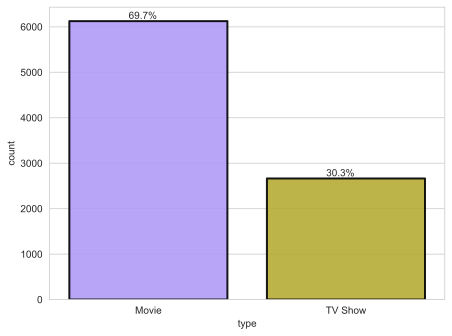

In [30]:
count_cat('type', ["#B09CF6", "#B6AC36"], var_x = 0.3, alpha = 0.9)
plt.tight_layout()


In [31]:
df['director'][0:20]

0                     Kirsten Johnson
1                     Julien Leclercq
2                       Mike Flanagan
3                       Bruno Garotti
4                        Haile Gerima
5                     Andy Devonshire
6                      Theodore Melfi
7                         Suhas Kadav
8                 Christian Schwochow
9                         Suhas Kadav
10                        Suhas Kadav
11                        Suhas Kadav
12                          Not Given
13    Krysia Plonka, Kristian Mercado
14    Krysia Plonka, Kristian Mercado
15    Krysia Plonka, Kristian Mercado
16    Krysia Plonka, Kristian Mercado
17                          Not Given
18                          Not Given
19       Mark Thornton, Todd Kauffman
Name: director, dtype: object

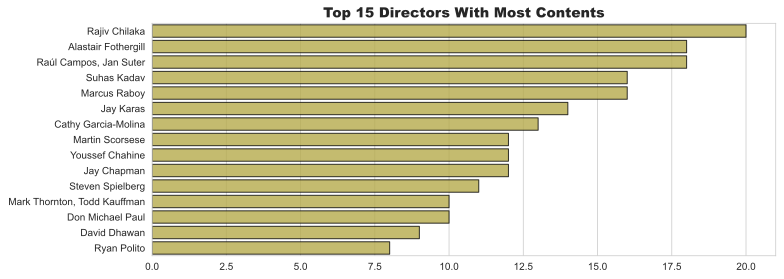

In [32]:
plt.figure(figsize = (11,4))
top_15 = df['director'].value_counts().drop('Not Given').head(15)
sns.barplot(x = top_15.values, y  = top_15.index , edgecolor = 'k', linewidth = 1, saturation = 1, color = '#b5aa4b', alpha =0.8)

plt.title("Top 15 Directors With Most Contents", fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

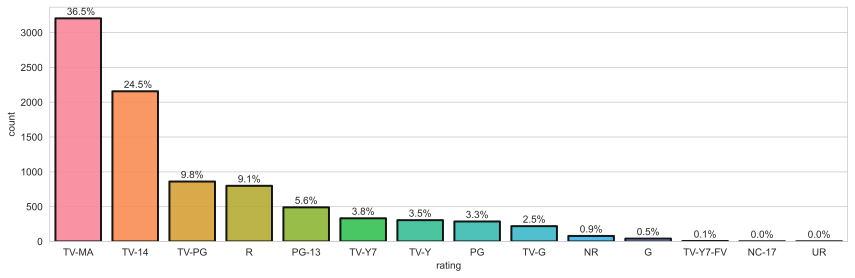

In [33]:
plt.figure(figsize = (12,4))
count_cat('rating', var_x = 0.2, alpha = 0.9)
plt.tight_layout()


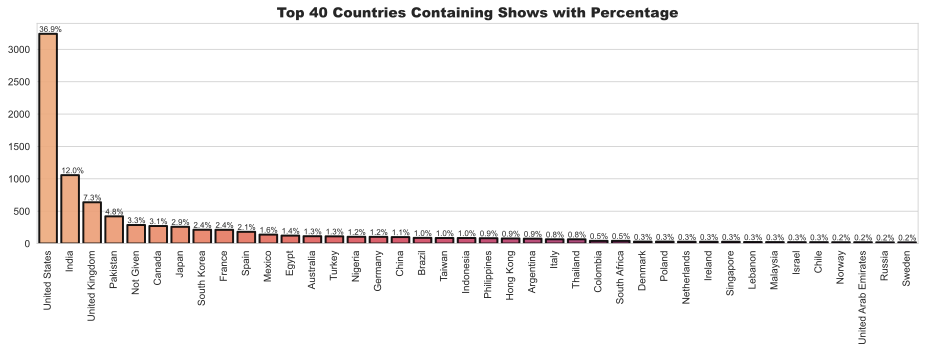

In [34]:
plt.figure(figsize = (13,5))

df_c = df['country'].value_counts().head(40)
count = sns.barplot(x = df_c.index, y=df_c.values , alpha = 0.9, saturation = 1  , edgecolor = 'k', linewidth = 2,palette = "flare")

for p in count.patches:
    per = round( (p.get_height()/df.shape[0])*100 ,1 )
    x = p.get_x() 
    y = p.get_height() + 30
    count.annotate('{0}%'.format(per), (x, y ), fontsize = 8)
    
plt.xticks(rotation = 90)
plt.title('Top 40 Countries Containing Shows with Percentage', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

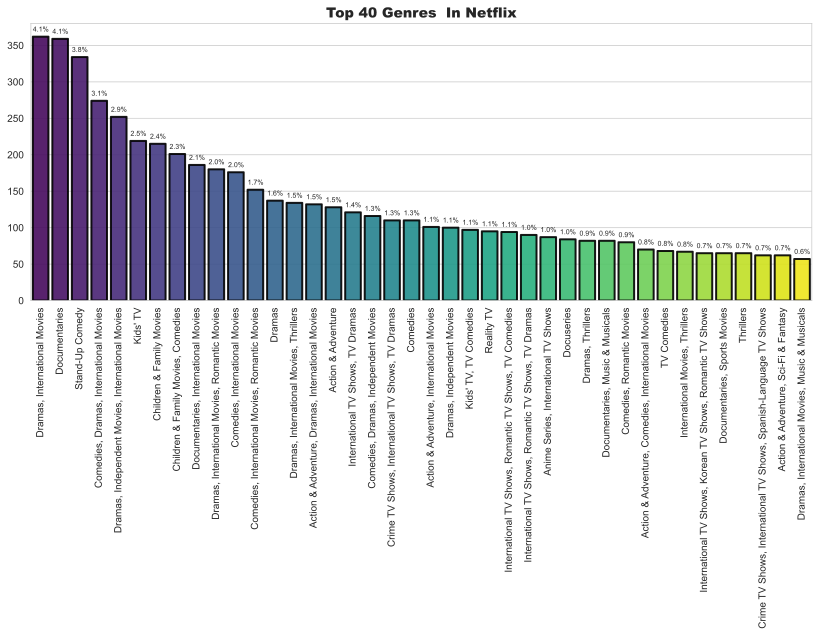

In [35]:
plt.figure(figsize = (14,5))

df_c = df['listed_in'].value_counts().head(40)
count = sns.barplot(x = df_c.index, y=df_c.values , alpha = 0.9, saturation = 1  , edgecolor = 'k', linewidth = 2, palette = "viridis")
for p in count.patches:
    per = round( (p.get_height()/df.shape[0])*100 ,1 )
    x = p.get_x() 
    y = p.get_height() +7
    count.annotate('{0}%'.format(per), (x, y ), fontsize = 7)
    
plt.xticks(rotation = 90)
plt.title('Top 40 Genres  In Netflix', fontsize = 14, fontweight = 'heavy')
plt.show()

## Visualization For Numerical Feature

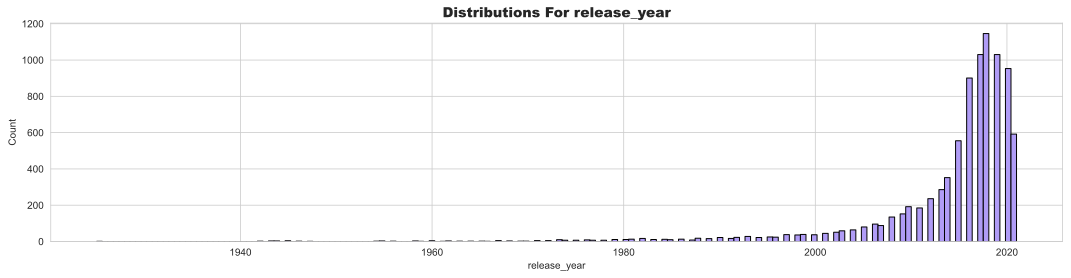

In [36]:
plt.figure(figsize = (15,4))

sns.histplot(df['release_year'], alpha = 1, color = "#B09CF6",edgecolor='k', linewidth = 1)
plt.title("Distributions For release_year", fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

Text(0.5, 1.0, 'Boxen Plot for release_year')

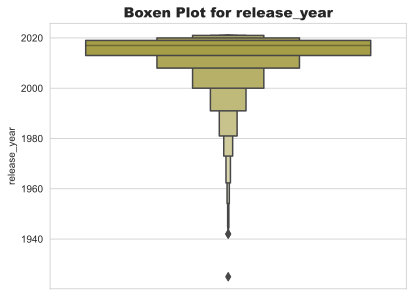

In [37]:
sns.boxenplot(y = df['release_year'], color = '#B6AC36')
plt.title("Boxen Plot for release_year", fontsize = 14, fontweight = 'heavy')

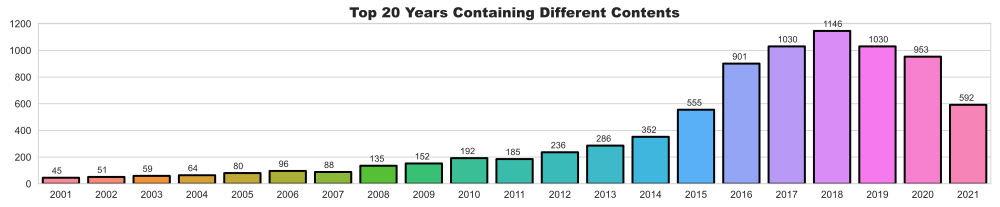

In [38]:
plt.figure(figsize = (14,3))
bars = sns.barplot(x = df['release_year'].value_counts().head(21).index , y = df['release_year'].value_counts().head(21).values, alpha = 1, saturation = 1  , edgecolor = 'k', linewidth = 2 )
for p in bars.patches:
    count = p.get_height()
    x = y = p.get_x()+ 0.2
    y = p.get_height() + 30
    bars.annotate('{0}'.format(int(count)), (x, y ), fontsize = 9)
plt.title('Top 20 Years Containing Different Contents', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

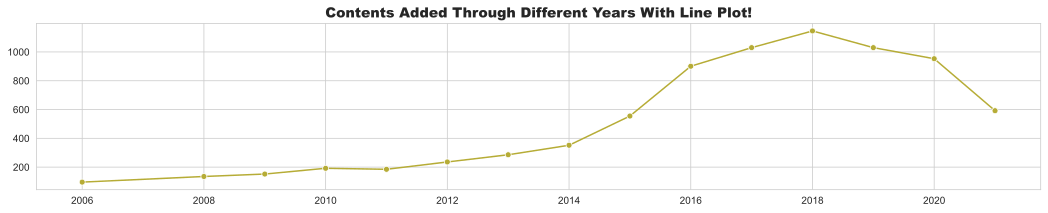

In [39]:
plt.figure(figsize = (18,3))
sns.lineplot(x = df['release_year'].value_counts().head(15).index , y = df['release_year'].value_counts().head(15).values, alpha = 1, color = "#B6AC36", marker='o')
plt.title('Contents Added Through Different Years With Line Plot!', fontsize = 14, fontweight = 'heavy')
plt.show()

In [40]:
df['listed_in'].value_counts().head(3)

Dramas, International Movies    362
Documentaries                   359
Stand-Up Comedy                 334
Name: listed_in, dtype: int64

# Summary From Visualizations:
1. Movie type is higher than TV Show (70% vs 30%)
2. Rajiv Chilaka has the largest number of works in the Netflix Dataset
3. TV-MA (Mature Audience Only) and TV-14 top ratings in Netflix Dataset
4. 37% Of Shows in the United States
5. Top Genres are: "Dramas, International Movies", "Documentaries, and "Stand-Up Comedy"
6. From Numerical Distribution we Films/ TV Shows most frequently in the 2000s specifically (2015: 2020)

We can move deeper to answer questions using pandas and visualize them using seaborn


Upvote if you liked it!, thanks...